# Xception TL

In [1]:
from brainprint.dl.load import read_dataset
from tensorflow import keras
from brainprint.dl.hyperxception import run_hyper_xception
from brainprint.dl.utils import VOLUME_SHAPE
from tensorflow_addons.metrics import RSquare

In [2]:
train, validation, test = read_dataset(target="personality")

2023-01-26 17:09:50.151647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 17:09:50.613532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6600 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:26:00.0, compute capability: 6.1


## Age

In [3]:
age_model = keras.models.load_model("/home/zvi/Projects/lab/HyperXception/Age/final")
age_model.trainable = False

In [4]:
embedded_layer = age_model.layers[-2].output
dropout = keras.layers.Dropout(rate=0.5)(embedded_layer)
prediction_layer = keras.layers.Dense(
    units=5, activation="linear", name="prediction_layer"
)(dropout)
new_model = keras.models.Model(inputs=age_model.input, outputs=prediction_layer)

In [5]:
new_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-6),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsoluteError(), RSquare()],    
)

In [6]:
stop_early = keras.callbacks.EarlyStopping(
    patience=8,
    restore_best_weights=True,
)
callbacks = [stop_early]

In [7]:
history = new_model.fit(train, epochs=50, validation_data=validation, callbacks=callbacks)

Epoch 1/50


2023-01-26 17:10:04.997231: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 339 of 1000
2023-01-26 17:10:15.007865: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 681 of 1000
2023-01-26 17:10:21.178815: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.
2023-01-26 17:10:21.574109: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


113/113 [==============================] - 54s 220ms/step - loss: 2.5805 - mean_absolute_error: 1.2484 - r_square: -6.2346 - val_loss: 0.7847 - val_mean_absolute_error: 0.6949 - val_r_square: -1.2983
Epoch 2/50


2023-01-26 17:10:57.252470: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 356 of 1000
2023-01-26 17:11:07.256145: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 729 of 1000


  1/113 [..............................] - ETA: 46:40 - loss: 1.6581 - mean_absolute_error: 1.0784 - r_square: -4.7624

2023-01-26 17:11:12.093048: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 44s 166ms/step - loss: 2.0561 - mean_absolute_error: 1.1322 - r_square: -4.6825 - val_loss: 0.7781 - val_mean_absolute_error: 0.6877 - val_r_square: -1.2765
Epoch 3/50


2023-01-26 17:11:40.966571: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 342 of 1000
2023-01-26 17:11:50.939395: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 682 of 1000


  1/113 [..............................] - ETA: 49:23 - loss: 1.3631 - mean_absolute_error: 0.9326 - r_square: -4.8531

2023-01-26 17:11:57.233747: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 45s 165ms/step - loss: 1.9369 - mean_absolute_error: 1.1074 - r_square: -4.3762 - val_loss: 0.7813 - val_mean_absolute_error: 0.6912 - val_r_square: -1.2918
Epoch 4/50


2023-01-26 17:12:26.017709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 367 of 1000
2023-01-26 17:12:36.024145: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 713 of 1000


  1/113 [..............................] - ETA: 48:22 - loss: 1.1581 - mean_absolute_error: 0.8577 - r_square: -3.0896

2023-01-26 17:12:41.777245: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 45s 166ms/step - loss: 1.9377 - mean_absolute_error: 1.0945 - r_square: -4.3911 - val_loss: 0.8529 - val_mean_absolute_error: 0.7206 - val_r_square: -1.5502
Epoch 5/50


2023-01-26 17:13:10.563023: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 351 of 1000
2023-01-26 17:13:20.561425: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 691 of 1000


  1/113 [..............................] - ETA: 48:27 - loss: 1.8693 - mean_absolute_error: 1.0242 - r_square: -5.1994

2023-01-26 17:13:26.368302: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 45s 168ms/step - loss: 1.8179 - mean_absolute_error: 1.0623 - r_square: -4.0668 - val_loss: 0.8167 - val_mean_absolute_error: 0.7135 - val_r_square: -1.4048
Epoch 6/50


2023-01-26 17:13:55.482881: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 348 of 1000
2023-01-26 17:14:05.486729: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 687 of 1000


  1/113 [..............................] - ETA: 48:57 - loss: 2.4205 - mean_absolute_error: 1.3045 - r_square: -15.6437

2023-01-26 17:14:11.557862: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 45s 168ms/step - loss: 1.7490 - mean_absolute_error: 1.0459 - r_square: -3.9064 - val_loss: 0.7911 - val_mean_absolute_error: 0.6907 - val_r_square: -1.3231
Epoch 7/50


2023-01-26 17:14:40.636341: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 339 of 1000
2023-01-26 17:14:50.622682: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 706 of 1000


  1/113 [..............................] - ETA: 48:00 - loss: 1.2618 - mean_absolute_error: 0.9289 - r_square: -2.1423

2023-01-26 17:14:56.192855: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 45s 169ms/step - loss: 1.7443 - mean_absolute_error: 1.0549 - r_square: -3.8956 - val_loss: 0.8155 - val_mean_absolute_error: 0.7101 - val_r_square: -1.3624
Epoch 8/50


2023-01-26 17:15:25.409575: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 350 of 1000
2023-01-26 17:15:35.403316: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 692 of 1000


  1/113 [..............................] - ETA: 49:41 - loss: 1.5194 - mean_absolute_error: 0.9425 - r_square: -4.2770

2023-01-26 17:15:41.875503: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 45s 168ms/step - loss: 1.7285 - mean_absolute_error: 1.0357 - r_square: -3.8273 - val_loss: 0.7709 - val_mean_absolute_error: 0.6886 - val_r_square: -1.2555
Epoch 9/50


2023-01-26 17:16:10.936902: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 337 of 1000
2023-01-26 17:16:20.940772: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 693 of 1000


  1/113 [..............................] - ETA: 48:32 - loss: 1.1190 - mean_absolute_error: 0.8235 - r_square: -3.3781

2023-01-26 17:16:26.783238: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 45s 170ms/step - loss: 1.7574 - mean_absolute_error: 1.0396 - r_square: -3.9463 - val_loss: 0.7558 - val_mean_absolute_error: 0.6770 - val_r_square: -1.2024
Epoch 10/50


2023-01-26 17:16:55.988536: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 354 of 1000
2023-01-26 17:17:06.024703: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 696 of 1000


  1/113 [..............................] - ETA: 48:39 - loss: 2.1661 - mean_absolute_error: 1.1198 - r_square: -3.1557

2023-01-26 17:17:11.883348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 45s 167ms/step - loss: 1.7062 - mean_absolute_error: 1.0284 - r_square: -3.7606 - val_loss: 0.7905 - val_mean_absolute_error: 0.6946 - val_r_square: -1.3312
Epoch 11/50


2023-01-26 17:17:40.813668: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 318 of 1000
2023-01-26 17:17:50.819469: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 682 of 1000


  1/113 [..............................] - ETA: 50:13 - loss: 1.5118 - mean_absolute_error: 0.9359 - r_square: -4.4877

2023-01-26 17:17:57.571373: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 46s 167ms/step - loss: 1.6152 - mean_absolute_error: 1.0002 - r_square: -3.5800 - val_loss: 0.7579 - val_mean_absolute_error: 0.6790 - val_r_square: -1.2088
Epoch 12/50


2023-01-26 17:18:26.500588: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 334 of 1000
2023-01-26 17:18:36.492792: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 702 of 1000


  1/113 [..............................] - ETA: 47:27 - loss: 1.7190 - mean_absolute_error: 1.1045 - r_square: -6.3775

2023-01-26 17:18:41.758847: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 44s 167ms/step - loss: 1.6050 - mean_absolute_error: 0.9957 - r_square: -3.5134 - val_loss: 0.7729 - val_mean_absolute_error: 0.6847 - val_r_square: -1.2828
Epoch 13/50


2023-01-26 17:19:10.693004: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 324 of 1000
2023-01-26 17:19:20.694831: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 689 of 1000


  1/113 [..............................] - ETA: 48:50 - loss: 1.6037 - mean_absolute_error: 0.9892 - r_square: -3.1246

2023-01-26 17:19:26.691556: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 45s 166ms/step - loss: 1.6054 - mean_absolute_error: 0.9998 - r_square: -3.5341 - val_loss: 0.7902 - val_mean_absolute_error: 0.6940 - val_r_square: -1.3084
Epoch 14/50


2023-01-26 17:19:55.485728: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 354 of 1000
2023-01-26 17:20:05.480061: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 717 of 1000


  1/113 [..............................] - ETA: 47:25 - loss: 2.4726 - mean_absolute_error: 1.2974 - r_square: -8.7247

2023-01-26 17:20:10.728809: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 44s 168ms/step - loss: 1.5974 - mean_absolute_error: 0.9952 - r_square: -3.4303 - val_loss: 0.7912 - val_mean_absolute_error: 0.6909 - val_r_square: -1.3260
Epoch 15/50


2023-01-26 17:20:39.693553: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 364 of 1000
2023-01-26 17:20:49.701242: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 717 of 1000


  1/113 [..............................] - ETA: 46:19 - loss: 1.0284 - mean_absolute_error: 0.8710 - r_square: -3.5615

2023-01-26 17:20:54.362302: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 44s 168ms/step - loss: 1.5381 - mean_absolute_error: 0.9790 - r_square: -3.3605 - val_loss: 0.7507 - val_mean_absolute_error: 0.6730 - val_r_square: -1.2041
Epoch 16/50


2023-01-26 17:21:23.403025: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 343 of 1000
2023-01-26 17:21:33.396386: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 702 of 1000


  1/113 [..............................] - ETA: 47:35 - loss: 1.5469 - mean_absolute_error: 0.9899 - r_square: -5.6070

2023-01-26 17:21:38.740349: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 44s 169ms/step - loss: 1.5593 - mean_absolute_error: 0.9850 - r_square: -3.3957 - val_loss: 0.8066 - val_mean_absolute_error: 0.7046 - val_r_square: -1.3480
Epoch 17/50


2023-01-26 17:22:07.949271: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 334 of 1000
2023-01-26 17:22:17.933229: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 671 of 1000


  1/113 [..............................] - ETA: 50:32 - loss: 1.2843 - mean_absolute_error: 0.9226 - r_square: -7.8206

2023-01-26 17:22:24.836709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 45s 161ms/step - loss: 1.5407 - mean_absolute_error: 0.9767 - r_square: -3.3113 - val_loss: 0.7594 - val_mean_absolute_error: 0.6776 - val_r_square: -1.2156
Epoch 18/50


2023-01-26 17:22:53.188511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 360 of 1000
2023-01-26 17:23:03.187094: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 712 of 1000


  1/113 [..............................] - ETA: 47:36 - loss: 1.5061 - mean_absolute_error: 0.9912 - r_square: -5.6805

2023-01-26 17:23:08.537898: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 44s 165ms/step - loss: 1.5270 - mean_absolute_error: 0.9782 - r_square: -3.3129 - val_loss: 0.7954 - val_mean_absolute_error: 0.6906 - val_r_square: -1.3324
Epoch 19/50


2023-01-26 17:23:37.174044: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 369 of 1000
2023-01-26 17:23:47.151094: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 737 of 1000


  1/113 [..............................] - ETA: 46:21 - loss: 1.4762 - mean_absolute_error: 0.9901 - r_square: -7.9046

2023-01-26 17:23:51.816811: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 43s 164ms/step - loss: 1.5163 - mean_absolute_error: 0.9656 - r_square: -3.2782 - val_loss: 0.8043 - val_mean_absolute_error: 0.7014 - val_r_square: -1.3838
Epoch 20/50


2023-01-26 17:24:20.423589: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 341 of 1000
2023-01-26 17:24:30.425084: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 702 of 1000


  1/113 [..............................] - ETA: 47:44 - loss: 1.6268 - mean_absolute_error: 1.0582 - r_square: -18.4308

2023-01-26 17:24:35.842207: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 44s 166ms/step - loss: 1.4492 - mean_absolute_error: 0.9517 - r_square: -3.1233 - val_loss: 0.7828 - val_mean_absolute_error: 0.6904 - val_r_square: -1.2679
Epoch 21/50


2023-01-26 17:25:04.698972: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 360 of 1000
2023-01-26 17:25:14.697213: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 722 of 1000


  1/113 [..............................] - ETA: 47:06 - loss: 1.6820 - mean_absolute_error: 0.9934 - r_square: -4.0961

2023-01-26 17:25:19.785455: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 44s 166ms/step - loss: 1.4634 - mean_absolute_error: 0.9621 - r_square: -3.1307 - val_loss: 0.7681 - val_mean_absolute_error: 0.6826 - val_r_square: -1.2252
Epoch 22/50


2023-01-26 17:25:48.592775: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 389 of 1000
2023-01-26 17:25:58.590042: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 750 of 1000


  1/113 [..............................] - ETA: 45:07 - loss: 1.4347 - mean_absolute_error: 0.9859 - r_square: -2.2317

2023-01-26 17:26:02.593052: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 43s 165ms/step - loss: 1.4836 - mean_absolute_error: 0.9663 - r_square: -3.1650 - val_loss: 0.8020 - val_mean_absolute_error: 0.7013 - val_r_square: -1.3295
Epoch 23/50


2023-01-26 17:26:31.271501: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 363 of 1000
2023-01-26 17:26:41.260232: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 690 of 1000


  1/113 [..............................] - ETA: 47:58 - loss: 1.4464 - mean_absolute_error: 0.9344 - r_square: -2.9850

2023-01-26 17:26:46.810888: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 44s 166ms/step - loss: 1.3881 - mean_absolute_error: 0.9373 - r_square: -2.8954 - val_loss: 0.7516 - val_mean_absolute_error: 0.6723 - val_r_square: -1.2102


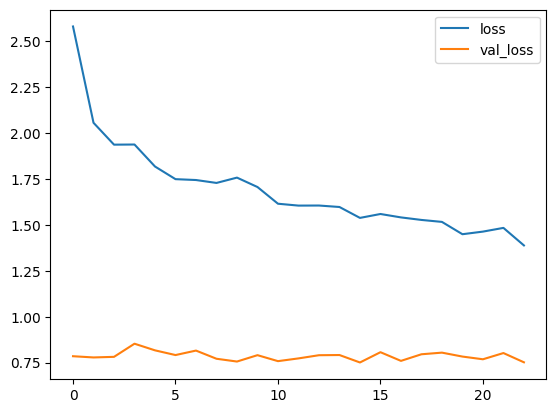

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [11]:
import pickle

with open("age_tl.pkl", "wb") as f:
    pickle.dump(history.history, f)    

: 